<a href="https://colab.research.google.com/github/dominiksakic/deeplearning00/blob/main/MultiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)


In [49]:
import numpy as np

def vectorize_sequence(sequence, dimension=10000):
  results = np.zeros((len(sequence), dimension))
  for i, sequence in enumerate(sequence):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [50]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)


# Encoding Strategy 2; Cast labels to integer tensors
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)

In [51]:
from keras import models
from keras import layers

model = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For Encoding Strategy 2; mathematically the same as above loss function
# difference is the interface
#model.compile(optimizer="rmsprop",
#              loss="sparse_categorical_crossentropy",
#              metrics=["accuracy"])

In [52]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [53]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.2847 - loss: 3.3494 - val_accuracy: 0.5830 - val_loss: 2.0088
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6439 - loss: 1.7568 - val_accuracy: 0.6780 - val_loss: 1.4332
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7269 - loss: 1.2437 - val_accuracy: 0.7280 - val_loss: 1.2298
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.7837 - loss: 1.0028 - val_accuracy: 0.7470 - val_loss: 1.1208
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8158 - loss: 0.8437 - val_accuracy: 0.7750 - val_loss: 1.0311
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8473 - loss: 0.7098 - val_accuracy: 0.7950 - val_loss: 0.9722
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8702 - loss: 0.6047 - val_accuracy: 0.8000 - val_loss: 0.9225
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.8941 - loss: 0.5059 - val_accuracy: 0.8160 - v

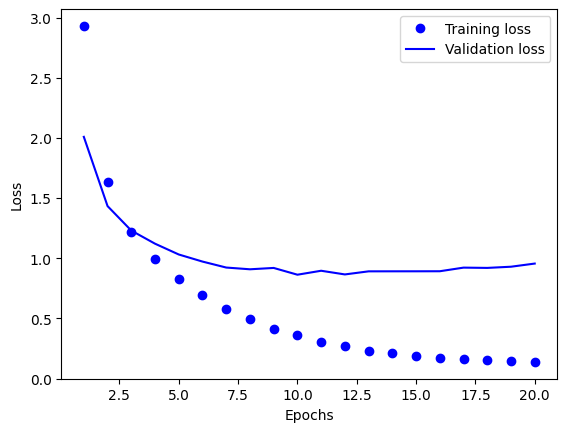

In [54]:
import matplotlib.pyplot as plt


loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

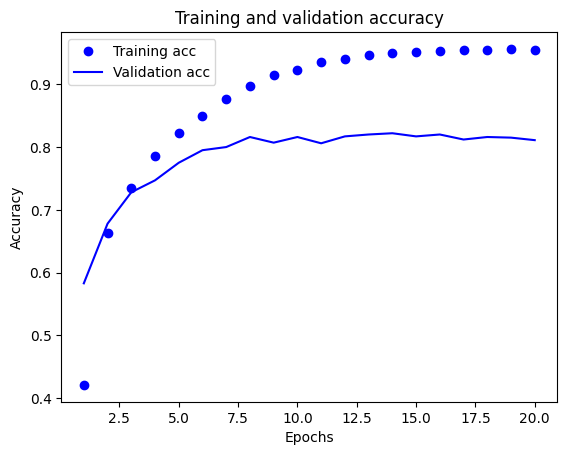

In [55]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Overfitting analysis

The model begins to overfit around epoch 9.
Observations:

1. Increasing Validation Loss: After Epoch 9, the validation loss starts to increase steadily, while the training loss continues to decrease. This difference indicates taht the model is becoming specialized to the training data and is losing its ability to generalize to unseen data.

2. Plateauing Validation Accuracy: Around the same epoch, the validation accuracy plateaus or shows marginal improvement, even though the training accuracy keeps increasing. This suggest taht the model performance on new data is not improving --> Sign of overfitting.


In [56]:
model = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer="rmsprop",
  loss="categorical_crossentropy",
  metrics=["accuracy"])

model.fit(x_train,
  y_train,
  epochs=9,
  batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4444 - loss: 2.9551
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6874 - loss: 1.4463
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7501 - loss: 1.1310
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7932 - loss: 0.9162
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8400 - loss: 0.7523
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8726 - loss: 0.5978
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.8943 - loss: 0.4995
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9130 - loss: 0.4195
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9281 - loss: 0.3515
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7992 - loss: 0.8940


In [36]:
results

[0.910980224609375, 0.7978628873825073]

In [45]:
predictions = model.predict(x_test)
np.argmax(predictions[0])

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


3